In [83]:
import numpy as np
import numpy.random as npr
import numpy.linalg as nla
import matplotlib.pyplot as plt

# Exercise 5.3 

Write a program to compute the pointwise variance curves for four different models,
 - Linear polynomial fits
 - Cubic polynomial fits have two and four
 - Cubic spline
 - Natural cubic spline
 
# Solution

Some functions used in the notebook,

In [84]:
def f(x,sigma):
    return np.cos(2*np.pi*x) + sigma*npr.randn(*x.shape)

def linear_mapping(X):
    
    X = X.reshape((X.size,1))
    
    return np.hstack((np.ones(X.shape),X))

def cubic_mapping(X):
    
    X = X.reshape((X.size,1))
    
    return np.hstack((np.ones(X.shape),X,X**2,X**3))

def cubic_spline_mapping(X,k1,k2):
    
    X = X.reshape((X.size,1))
    
    return np.hstack((np.ones(X.shape),
                      X,
                      X**2,
                      X**3,
                      np.maximum(np.zeros(X.shape),(X-k1)**3),
                      np.maximum(np.zeros(X.shape),(X-k2)**3)
                     ))

def natural_cubic_spline_mapping(X,ks):
    
    X = X.reshape((X.size,1))
    
    H = np.hstack((np.ones(X.shape),X))
    
    K1 = ks.pop()
    K2 = ks.pop()
    
    dK=(np.maximum(np.zeros(X.shape),(X-K2)**3)-np.maximum(np.zeros(X.shape),(X-K1)**3))/(K1-K2)
    
    for k in ks:
        dk=(np.maximum(np.zeros(X.shape),(X-k)**3)-np.maximum(np.zeros(X.shape),(X-K1)**3))/(K1-k)
        H = np.hstack((H,dk-dK))
    
    return H

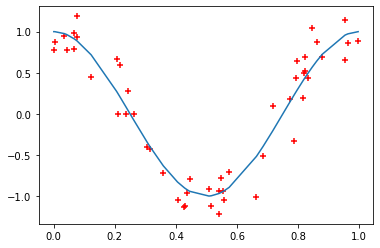

In [85]:
X = npr.rand(50)
X.sort()
y = f(X,0.3)

plt.plot(X,f(X,0))
plt.scatter(X,y,marker='+',c='r')
plt.show()

### Linear Fit

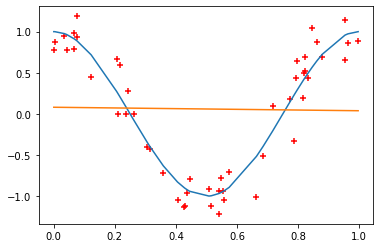

In [86]:
X_lin = linear_mapping(X)
theta_lin = nla.pinv(X_lin.T @ X_lin) @ X_lin.T @ y

y_lin = X_lin @ theta_lin

var_lin = np.array([h @ nla.pinv(X_lin.T @ X_lin) @ h.T for h in X_lin])

plt.plot(X,f(X,0))
plt.scatter(X,y,marker='+',c='r')
plt.plot(X,y_lin)
plt.show()

### Cubic fit

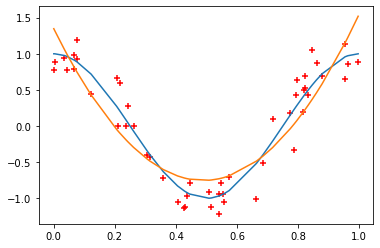

In [87]:
X_cub = cubic_mapping(X)
theta_cub = nla.pinv(X_cub.T @ X_cub) @ X_cub.T @ y

y_cub = X_cub @ theta_cub

var_cub = np.array([h @ nla.pinv(X_cub.T @ X_cub) @ h.T for h in X_cub])

plt.plot(X,f(X,0))
plt.scatter(X,y,marker='+',c='r')
plt.plot(X,y_cub)
plt.show()

### Cubic spline with 2 knots

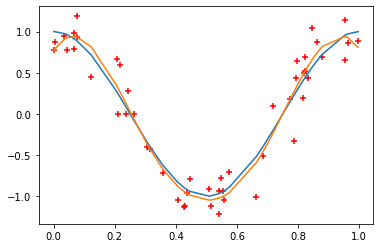

In [88]:
X_cub_spl = cubic_spline_mapping(X,1/3,2/3)
theta_cub_spl = nla.pinv(X_cub_spl.T @ X_cub_spl) @ X_cub_spl.T @ y

y_cub_spl = X_cub_spl @ theta_cub_spl

var_cub_spl = np.array([h @ nla.pinv(X_cub_spl.T @ X_cub_spl) @ h.T for h in X_cub_spl])

plt.plot(X,f(X,0))
plt.scatter(X,y,marker='+',c='r')
plt.plot(X,y_cub_spl)
plt.show()

### Natural cubic spline with 6 knots (4 internal and 2 boundary)

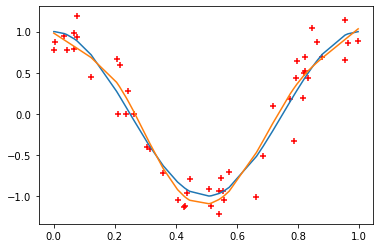

In [89]:
ks = [0.1,1/5,2/5,3/5,4/5,0.9]
X_nat_cub_spl = natural_cubic_spline_mapping(X,ks)
theta_nat_cub_spl = nla.pinv(X_nat_cub_spl.T @ X_nat_cub_spl) @ X_nat_cub_spl.T @ y

y_nat_cub_spl = X_nat_cub_spl @ theta_nat_cub_spl

var_nat_cub_spl = np.array([h @ nla.pinv(X_nat_cub_spl.T @ X_nat_cub_spl) @ h.T for h in X_nat_cub_spl])

plt.plot(X,f(X,0))
plt.scatter(X,y,marker='+',c='r')
plt.plot(X,y_nat_cub_spl)
plt.show()

### Point-wise variance plot

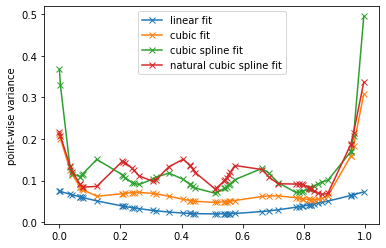

In [91]:
plt.plot(X,var_lin,marker='x',label='linear fit')
plt.plot(X,var_cub,marker='x',label='cubic fit')
plt.plot(X,var_cub_spl,marker='x',label='cubic spline fit')
plt.plot(X,var_nat_cub_spl,marker='x',label='natural cubic spline fit')
plt.ylabel('point-wise variance')
plt.legend()
plt.show()